In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:

def get_ipea(code, cols=None):
    v_tabelas = pd.read_html(f'http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid={code}&oper=view', thousands='.', decimal=',', header=0, encoding='UTF-8')
    df = v_tabelas[2]
    if cols is not None:
        df.columns = cols
        df[cols[0]] = pd.to_datetime(df[cols[0]], dayfirst=True)
    return df

df_petr = get_ipea(1650971490, ['Data', 'Preco_USD'])


In [3]:
#https://www.eia.gov/energyexplained/oil-and-petroleum-products/where-our-oil-comes-from.php
df_top = pd.read_csv(r"bases\top-oil-countries.csv")
df_top

,Year,United States,Saudi Arabia,Russia,Canada,Iraq,Former U.S.S.R.
0,1980,8.597,9.900,NaN,1.435,2.514,11.706
1,1981,8.572,9.815,NaN,1.285,1.000,11.850
2,1982,8.649,6.483,NaN,1.271,1.012,11.912
3,1983,8.688,5.086,NaN,1.356,1.005,11.972
4,1984,8.879,4.663,NaN,1.438,1.209,11.861
5,1985,8.971,3.388,NaN,1.471,1.433,11.585
6,1986,8.680,4.870,NaN,1.474,1.690,11.895
7,1987,8.349,4.265,NaN,1.535,2.079,12.050
8,1988,8.140,5.086,NaN,1.616,2.685,12.053
9,1989,7.613,5.064,NaN,1.560,2.897,11.715


In [4]:
##### LER BASES DO IPEA

#Petroleo
df_petr = get_ipea(1650971490, ['Data', 'Preco_USD'])

#Dolar
#df_dolar = get_ipea(38590, ['Data', 'Valor_BRL'])

In [5]:
# df_dolar['Valor_BRL'] = df_dolar['Valor_BRL'].round(4)
# df_j = df_petr.merge(df_dolar, how='left', on=['Data'])
# df_j = df_j[df_j['Data'].dt.year >= 2010]
# df_j['Valor_BRL'] = df_j['Valor_BRL'].bfill().fillna(0)
# #df_j[df_j['Valor_BRL'].isna()]
# df_j

In [14]:
df_menor = df_petr.sort_values(by="Preco_USD", ascending=False)
df_menor

,Data,Preco_USD,Dia,Ano,AnoMes,Quarter,dif_d_seguinte
5127,2008-07-03,143.95,3,2008,200807,200803,-5.55
5123,2008-07-07,143.95,7,2008,200807,200803,-9.80
5115,2008-07-15,143.68,15,2008,200807,200803,-10.37
5112,2008-07-18,142.43,18,2008,200807,200803,-6.41
5128,2008-07-02,141.24,2,2008,200807,200803,2.71
...,...,...,...,...,...,...,...
8224,1998-12-21,9.45,21,1998,199812,199804,0.38
8229,1998-12-14,9.45,14,1998,199812,199804,0.12
8230,1998-12-11,9.26,11,1998,199812,199804,0.19
1032,2020-04-21,9.12,21,2020,202004,202002,4.65


In [6]:
df_petr['Dia'] = df_petr['Data'].dt.day
df_petr['Ano'] = df_petr['Data'].dt.year
df_petr['AnoMes'] = df_petr['Data'].dt.year * 100 + df_petr['Data'].dt.month
df_petr['Quarter'] = df_petr['Data'].dt.year * 100 + df_petr['Data'].dt.quarter
df_petr['dif_d_seguinte'] = round((df_petr['Preco_USD'].shift(1) - df_petr['Preco_USD']).fillna(0),2)
df_petr_filtro = df_petr.query("AnoMes >= 201901 and AnoMes <= 202012")

In [33]:
ano = 2024
df_ano = df_petr.query("Ano >= 1990").groupby(by="Ano").agg({'Preco_USD':['min','max']})
df_ano

Preco_USD        
           min     max
Ano                   
1990     14.68   41.45
1991     17.60   30.28
1992     17.05   21.55
1993     13.13   19.60
1994     13.00   19.03
1995     15.35   19.38
1996     16.23   25.40
1997     15.86   24.83
1998      9.10   16.28
1999      9.77   26.46
2000     21.05   37.43
2001     16.51   30.68
2002     18.17   32.02
2003     23.23   34.94
2004     29.02   52.28
2005     38.93   67.26
2006     55.82   78.26
2007     49.95   95.66
2008     33.73  143.95
2009     34.16   78.68
2010     67.18   93.63
2011     92.50  126.64
2012     88.69  128.14
2013     96.84  118.90
2014     55.27  115.19
2015     35.26   66.33
2016     26.01   54.95
2017     43.98   66.80
2018     50.57   86.07
2019     53.23   74.94
2020      9.12   70.25
2021     50.37   85.76
2022     76.02  133.18
2023     71.03   97.10
2024     75.47   93.12

In [30]:
df_ano.index

Index([2024], dtype='int32', name='Ano')

In [45]:
df_media_movel = df_petr.query("Ano >= 1990")
df_media_movel['mediaMovel'] = df_media_movel.sort_values(by="Data")['Preco_USD'].rolling(window=30).mean()
df_media_movel


C:\Users\Vinícius\AppData\Local\Temp\ipykernel_10436\917872428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media_movel['mediaMovel'] = df_media_movel.sort_values(by="Data")['Preco_USD'].rolling(window=30).mean()


,Data,Preco_USD,Dia,Ano,AnoMes,Quarter,dif_d_seguinte,mediaMovel
0,2024-05-13,83.18,13,2024,202405,202402,0.00,88.060000
1,2024-05-10,83.39,10,2024,202405,202402,-0.21,88.118667
2,2024-05-09,83.27,9,2024,202405,202402,0.12,88.202667
3,2024-05-08,82.44,8,2024,202405,202402,0.83,88.299667
4,2024-05-07,82.69,7,2024,202405,202402,-0.25,88.380667
...,...,...,...,...,...,...,...,...
10495,1990-01-08,21.38,8,1990,199001,199001,-0.35,NaN
10496,1990-01-05,23.13,5,1990,199001,199001,-1.75,NaN
10497,1990-01-04,22.50,4,1990,199001,199001,0.63,NaN
10498,1990-01-03,22.65,3,1990,199001,199001,-0.15,NaN


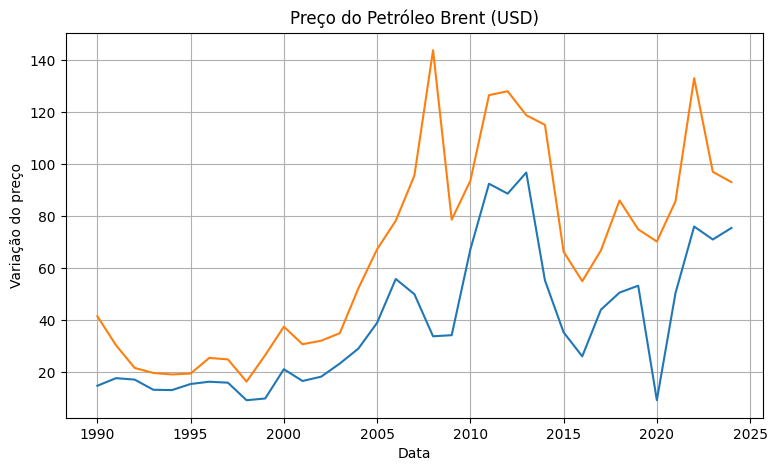

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5, forward=True)

ax.plot(df_ano.index, df_ano['Preco_USD']['min'])
ax.plot(df_ano.index, df_ano['Preco_USD']['max'])

ax.set(xlabel='Data', ylabel='Variação do preço',
       title='Preço do Petróleo Brent (USD)')
ax.grid(axis='y')

In [37]:
df_ano_dif = df_petr.query("Ano >= 1990").groupby(by="Ano").agg({'dif_d_seguinte':'mean'})
df_ano_dif

,dif_d_seguinte
Ano,
1990,0.021797
1991,-0.032412
1992,-0.002802
1993,-0.017063
1994,0.009722
1995,0.012134
1996,0.021654
1997,-0.035000
1998,-0.019091


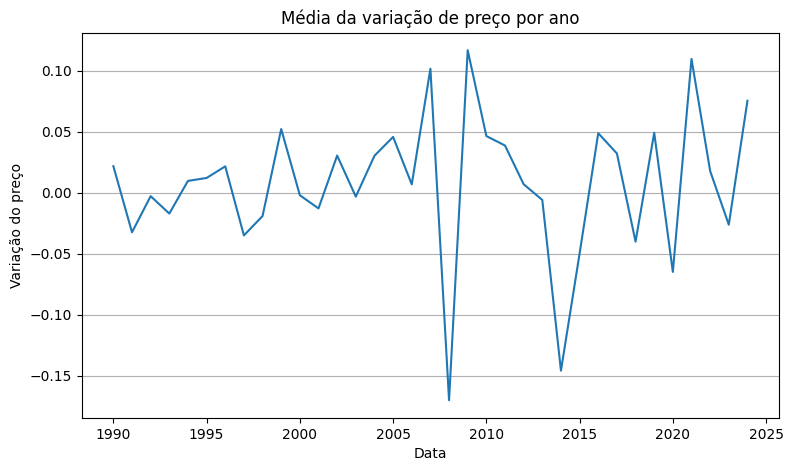

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5, forward=True)

ax.plot(df_ano_dif.index, df_ano_dif['dif_d_seguinte'])

ax.set(xlabel='Data', ylabel='Variação do preço',
       title='Média da variação de preço por ano')
ax.grid(axis='y')

In [27]:
x = df_petr_filtro.groupby("AnoMes").agg({"Preco_USD":'mean'}).reset_index()

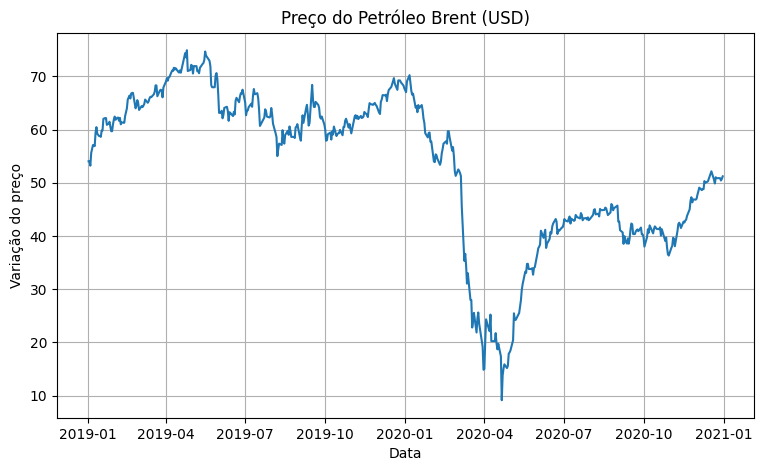

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5, forward=True)

ax.plot(df_petr_filtro['Data'], df_petr_filtro['Preco_USD'])
#ax.plot(x['Quarter'], x['Preco_USD'])

ax.set(xlabel='Data', ylabel='Variação do preço',
       title='Preço do Petróleo Brent (USD)')
ax.grid()

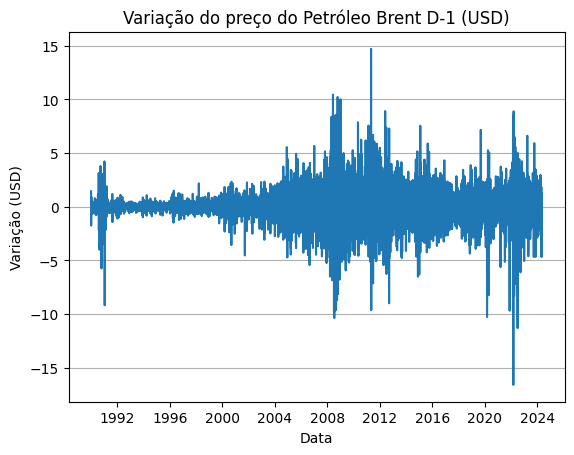

In [11]:
fig, ax = plt.subplots()
ax.plot(df_petr_filtro['Data'], df_petr_filtro['dif_d_seguinte'])

ax.set(xlabel='Data', ylabel='Variação (USD)',
       title='Variação do preço do Petróleo Brent D-1 (USD)')
ax.grid(axis='y')

In [22]:
df_maiores_diff = df_petr[abs(df_petr['dif_d_seguinte']) > 5]
df_maiores_diff

,Data,Preco_USD,dia,Anomes,dif_d_seguinte
134,2023-10-12,88.40,12,202310,5.93
269,2023-03-31,79.19,31,202303,6.62
332,2023-01-03,80.36,3,202301,-5.05
404,2022-09-22,90.40,22,202209,-6.11
432,2022-08-12,103.70,12,202208,-5.45
...,...,...,...,...,...
5777,2006-09-05,70.49,5,200609,-5.08
5784,2006-08-29,72.58,29,200608,-5.43
6418,2004-12-02,38.49,2,200412,5.56
10224,1991-01-16,30.28,16,199101,-9.18


In [7]:
##Ver diferença maiores diferença de preço do petroleo d0 e d-1 ou m0 e m-1 e pesquisar sobre motivos



#Produtores de petróleo e share de produção -- aumento da produ

#Conflitos internacionais que influenciaram o preço - Covid e Guerra da ucrânia